In [1]:
import numpy
import itertools
import matplotlib.pyplot as plt
import scipy.io
%matplotlib inline
import matplotlib.cm as cm

train_mat = scipy.io.loadmat('mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']

test_mat = scipy.io.loadmat('mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']


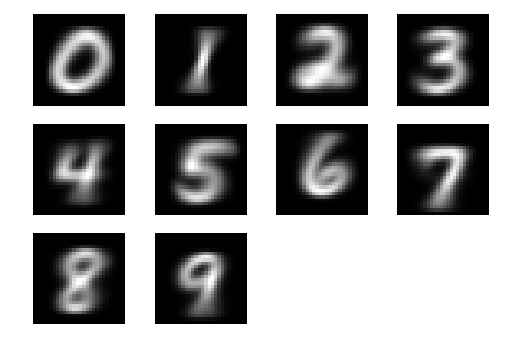

Error:  0.1797


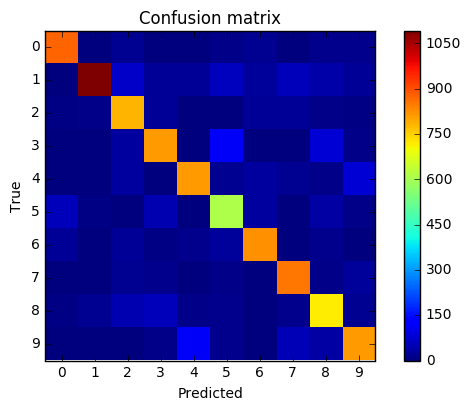

In [5]:
#part one
mean = []
digit_data = []
for i in xrange(0,10):
    allindex = numpy.where(train_labels == i)[0]
    digit_data.append(train_data[:,allindex])
    mean.append(numpy.mean(digit_data[i], axis = 1))

ShowAvgData(mean)

#part two
error = 0
confusion = numpy.zeros((10,10))
for i in xrange(len(test_labels)):
    allprob = numpy.zeros(10)
    index = 0
    for meanimage in mean:
        gaus = likelihood(meanimage.reshape((784,1)), test_data[:,[i]])
        allprob[index] =(gaus)
        index+=1
    prediction = numpy.argmax(allprob)
    confusion[prediction,int(test_labels[i])]+=1
    if(prediction != int(test_labels[i])):
        error+=1
plot_confusion_matrix(confusion, numpy.arange(0,10))
print "Error: ", (float(error)/len(test_labels))


In [2]:
def likelihood(mu,x):
    num = numpy.exp(-.5*numpy.dot(numpy.transpose(x-mu),(x-mu)))
    return num

In [3]:
def ShowAvgData(avgData):
    x = -1
    l = -1
    fig, ax = plt.subplots(3, 4)
    for X in avgData:
        l+=1
        y = l % 4
        if y == 0:
            x+=1
        ax[x,y].imshow( X.reshape(28,28).T, interpolation='nearest', cmap=cm.gray)
        ax[x,y].set_axis_off()
    
    ax[2,2].set_axis_off()
    ax[2,3].set_axis_off()
    plt.show()

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="jet"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')


Error:  0.04


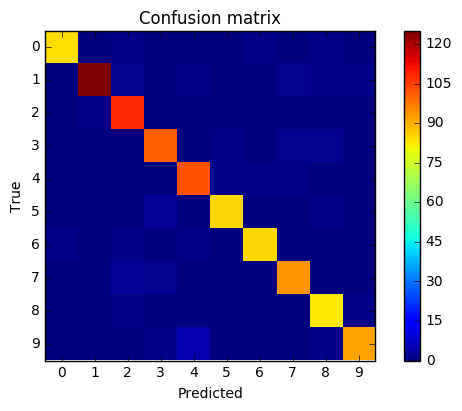

In [15]:
#part three
error = 0
confusion = numpy.zeros((10,10))
for testimage in xrange(1000):
    allprob = numpy.zeros(10)
    index = 0
    for i in xrange(0,10):
        exponent = numpy.exp(-.5*numpy.sum((test_data[:,[testimage]] - digit_data[i])**2,axis = 0))
        likelihood = numpy.mean(exponent)
        allprob[index] = likelihood
        index+=1
    prediction = numpy.argmax(allprob)
    confusion[prediction,int(test_labels[testimage])]+=1
    if(prediction != int(test_labels[testimage])):
        error+=1
#     if testimage % 100 == 0:
#         total = testimage
#         if testimage == 0:
#             total = 1
#         print "Test Image:", testimage, " Error: ", (float(error)/total)
        
plot_confusion_matrix(confusion, numpy.arange(0,10))
print "Error: ", (float(error)/1000)

